# Overview



In [1]:
#Core imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Import data

data = pd.read_csv('../ads/Advertisement_Transcripts.csv')

In [3]:
#explore data
data.info()

#5 columns with 1,9935 enties 
#the label column is blank and will be dropped for exploration 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         1935 non-null   object 
 1   Advertiser       1935 non-null   object 
 2   Product_or_spot  1935 non-null   object 
 3   Ad_copy          1935 non-null   object 
 4   label            0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 75.8+ KB


In [4]:
if 'label' in data.columns:
    data.drop(columns='label', inplace= True)

data.head()

,Category,Advertiser,Product_or_spot,Ad_copy
0,Advocacy,23 Women,23 Women,Women make up seventy percent of the labor for...
1,Advocacy,AARP,AARP,It's right in your own backyard.\nWhile it may...
2,Advocacy,Above the Influence,Above the Influence (PSA),"I thought I respected myself. That is, until I..."
3,Advocacy,Adopt-A-Horse,Adopt-A-Horse,If there's a place in your heart for a wild mu...
4,Advocacy,Amberalert.org,Amberalert.org,"When someone abducts a child, they're not abou..."


In [5]:
#Checking for blank rows 

# show blank rows
blank_df = data.isnull().any(axis=1)
blank_rows = data[blank_df]
print(blank_rows)

# drop row 1935 
if 1935 in data.index:
    if data.loc[1935].isnull().all():
        data.drop(index=1935, inplace=True)

print('Updated number of blank rows:\n', data.isnull().sum())

     Category Advertiser Product_or_spot Ad_copy
1935      NaN        NaN             NaN     NaN
Updated number of blank rows:
 Category           0
Advertiser         0
Product_or_spot    0
Ad_copy            0
dtype: int64


In [6]:
#Explore groups
category_counts = data['Category'].value_counts()


# print the results
print('Category counts:\n', category_counts)



Category counts:
 Automotive               289
Food & Beverage          244
Home & Personal Care     215
Travel                   193
Advocacy                 156
Financial                142
Beauty                   103
Services                  98
Media & Entertainment     74
Health Care               73
Alcohol & Spirits         64
Restaurants               54
Retail                    47
Telecommunications        44
Insurance                 43
Education                 24
Electronics               16
Technology                13
Sports                    12
Residential               11
Political                  8
Agricultural               5
Appliances                 5
HeaLth Care                2
Name: Category, dtype: int64


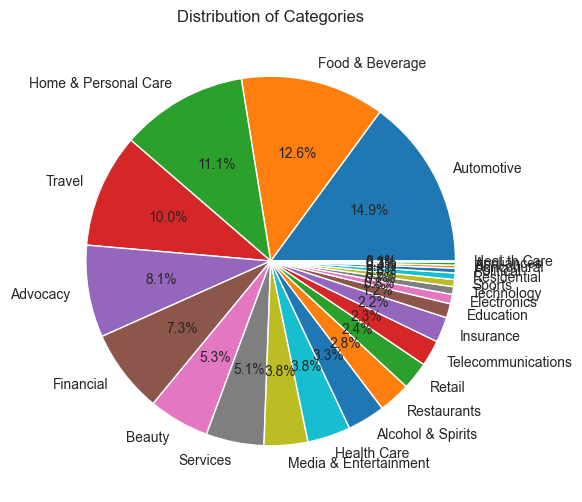

In [7]:
#Visual look at catorgires 
sns.set_style('whitegrid')
plt.figure(figsize=(6, 6))
plt.title('Distribution of Categories')
sns.color_palette('pastel')
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.show()

In [8]:
#Check for duplicates
print(data.describe(include='all'))

#There are 26 duplicates
duplicate_= data.duplicated(subset=['Ad_copy']).sum()

print(f"There are {duplicate_} duplicates in the 'Ad_copy' column.")

if duplicate_ > 0:
    data.drop_duplicates(subset=['Ad_copy'], inplace=True)
    dups_= data.duplicated(subset=['Ad_copy']).sum()
    print(f"Now there are {dups_} duplicates in the 'Ad_copy' column.")

          Category Advertiser                      Product_or_spot  \
count         1935       1935                                 1935   
unique          24       1348                                 1904   
top     Automotive       AT&T  Revlon High Demension Color Accents   
freq           289         19                                    2   

                                                  Ad_copy  
count                                                1935  
unique                                               1909  
top     Sure, you're working hard to retire early. But...  
freq                                                    2  
There are 26 duplicates in the 'Ad_copy' column.
Now there are 0 duplicates in the 'Ad_copy' column.


Thinking 

The plan was to drop all the coulmn expct for the ad copy but it would be intesrestin to see the ratio of words in relation to the catorgy. 

#Cleaning Data

In [9]:
#Imports
from collections import Counter

In [10]:
#Drop columns not needed
if 'Advertiser' in data.columns:
    data.drop(columns='Advertiser', inplace= True)
if 'Product_or_spot' in data.columns:
    data.drop(columns='Product_or_spot', inplace= True)

data.head()

,Category,Ad_copy
0,Advocacy,Women make up seventy percent of the labor for...
1,Advocacy,It's right in your own backyard.\nWhile it may...
2,Advocacy,"I thought I respected myself. That is, until I..."
3,Advocacy,If there's a place in your heart for a wild mu...
4,Advocacy,"When someone abducts a child, they're not abou..."


In [11]:
#Add feature for length of tweet and number of words in text
data['len'] = data['Ad_copy'].astype(str).apply(len)
data['word_count'] = data['Ad_copy'].apply(lambda x: len(str(x).split()))
data.head(5)

,Category,Ad_copy,len,word_count
0,Advocacy,Women make up seventy percent of the labor for...,402,75
1,Advocacy,It's right in your own backyard.\nWhile it may...,600,108
2,Advocacy,"I thought I respected myself. That is, until I...",221,42
3,Advocacy,If there's a place in your heart for a wild mu...,955,161
4,Advocacy,"When someone abducts a child, they're not abou...",223,40


               len   word_count
count  1909.000000  1909.000000
mean    373.137768    63.166056
std     218.448576    37.251555
min      20.000000     4.000000
25%     242.000000    40.000000
50%     337.000000    57.000000
75%     451.000000    77.000000
max    2422.000000   389.000000


<Axes: title={'center': 'Word Count Distribution'}, ylabel='Frequency'>

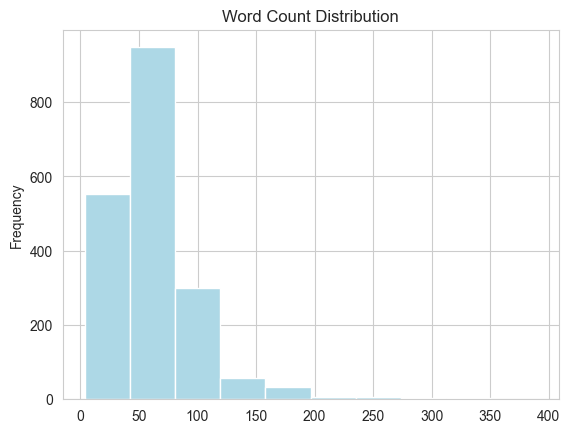

In [12]:
print(data.describe())


data['word_count'].plot(
    kind='hist',
    bins=10,
    color='lightblue',
    title='Word Count Distribution')

The range of text length is wide from 4 words to 389 words. 

<Axes: title={'center': 'Top 20 words'}, xlabel='word'>

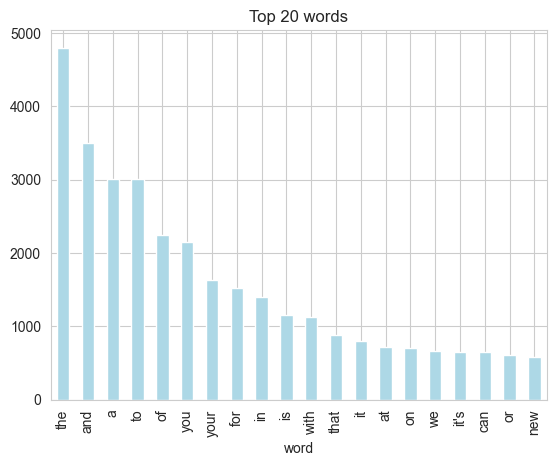

In [13]:
all_words = []
for line in list(data['Ad_copy']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(20)
a


df1 = pd.DataFrame(Counter(all_words).most_common(20), columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='lightblue', title='Top 20 words')

#top words seem to be filler words

In [20]:
#looking for other option that would need to be removed 

random_sample = data.sample(n=10)
pd.set_option('display.max_colwidth', 1000)

# print the random sample
print(random_sample['Ad_copy'].to_string(index=False))

#\n 
#numbers
#call - as ads were spoke out word adds no context
#website .com/
#$ and any other money related signs 
#% 

                                                                                                                                                                                                                                                                                                                                                 Inheritance planning is simply outlining what you want to happen to your estate and your dependents when you're no longer here. A robust plan using wills and trusts could help your loved ones to benefit the most from what you leave behind.
                                                                                                                                                                                                                                                                                                                            "Deja food. The eerie feeling your having the same food at every group event. Because... you are. But now, 

In [42]:
#Words mixture of relvent inclusive and non-inclsive words. Words were source from vasious location 



masculine_words = [
    "active",
    "adventurous",
    "aggress",
    "ambitio",
    "analy",
    "assert",
    "athlet",
    "autonom",
    "battle",
    "boast",
    "challeng",
    "champion",
    "compet",
    "confident",
    "courag",
    "decid",
    "decision",
    "decisive",
    "defend",
    "determin",
    "domina",
    "dominant",
    "driven",
    "fearless",
    "fight",
    "force",
    "greedy",
    "head-strong",
    "headstrong",
    "hierarch",
    "hostil",
    "impulsive",
    "independen",
    "individual",
    "intellect",
    "lead",
    "logic",
    "objective",
    "opinion",
    "outspoken",
    "persist",
    "principle",
    "reckless",
    "self-confiden",
    "self-relian",
    "self-sufficien",
    "selfconfiden",
    "selfrelian",
    "selfsufficien",
    "stubborn",
    "superior",
    "unreasonab"
]

feminine_words = [
    "agree",
    "affectionate",
    "child",
    "cheer",
    "collab",
    "commit",
    "communal",
    "compassion",
    "connect",
    "considerate",
    "cooperat",
    "co-operat",
    "depend",
    "emotiona",
    "empath",
    "feel",
    "flatterable",
    "gentle",
    "honest",
    "interpersonal",
    "interdependen",
    "interpersona",
    "inter-personal",
    "inter-dependen",
    "inter-persona",
    "kind",
    "kinship",
    "loyal",
    "modesty",
    "nag",
    "nurtur",
    "pleasant",
    "polite",
    "quiet",
    "respon",
    "sensitiv",
    "submissive",
    "support",
    "sympath",
    "tender",
    "together",
    "trust",
    "understand",
    "warm",
    "whin",
    "enthusias",
    "inclusive",
    "yield",
    "share",
    "sharin"
]

gendered_words = [
    "Actor",
    "Actress",
    "male",
    "man",
    "master",
    "Bogeyman",
    "Boogeyman",
    "Businessman",
    "Businessmen",
    "Chairman",
    "Congressman",
    "Crone",
    "sir"
    "madam",
    "Female",
    "Fireman",
    "Gals",
    "Girl",
    "Girls",
    "Guys",
    "Hag",
    "Housekeeping",
    "Ladies",
    "gentlemen",
    "Ladies room",
    "Lady",
    "Lady time",
    "Ladylike",
    "Mailman",
    "Man hours",
    "Man made",
    "Man up",
    "Mankind",
    "Manpower",
    "Mastered",
    "Mastering",
    "Old geezer",
    "Policeman",
    "Postman",
    "Prostitute",    
    "Skank",    
    "Skanky",    
    "Slut",    
    "Steward",    
    "Stewardess",    
    "Stewardesses",    
    "The common man",    
    "Tramp",    
    "Whore"]

masculine_pronouns = ['he', 'him', 'his', 'himself', 'man', 'men', 'male', 'father', 'brother', 'son', 'uncle', 'grandfather', 'nephew', 'husband', 'boyfriend', 'groom', 'king', 'prince', 'emperor', 'sir', 'lord']

feminine_pronouns = ['she', 'her', 'hers', 'herself', 'woman', 'women', 'female', 'mother', 'sister', 'daughter', 'aunt', 'grandmother', 'niece', 'wife', 'girlfriend', 'bride', 'queen', 'princess', 'empress', 'lady', 'madam']



In [57]:
# Pick the text 
text = data['Ad_copy'].sample().iloc[0]

# check if any feminine words are in the text
fem_words = [word for word in feminine_words if word in text.lower()]
fem_in_text = len(fem_words)

# check if any masculine words are in the text
masc_words = [word for word in masculine_words if word in text.lower()]
masc_in_text = len(masc_words)

# check if any gendered words are in the text
maspro_words = [word for word in masculine_pronouns if word in text.lower()]
fempro_words = [word for word in feminine_pronouns if word in text.lower()]
gen_in_text = len(maspro_words) + len(fempro_words)

# print the results
print('Feminine words in text:', fem_in_text)
print('Masculine words in text:', masc_in_text)
print('Gendered words in text:', gen_in_text)
print('Pronouns words in text: fem', len(fempro_words), 'male', len(maspro_words))
print('Feminine words found:', fem_words)
print('Masculine words found:', masc_words)
print('Gendered words found:', maspro_words + fempro_words)
print(text)


Feminine words in text: 0
Masculine words in text: 0
Gendered words in text: 2
Pronouns words in text: fem 0 male 2
Feminine words found: []
Masculine words found: []
Gendered words found: ['he', 'king']
Jarlsberg Lite has 50% less fat and 60% less cholesterol than regular Swiss. It's delicious with fruit, salads, sandwiches. Or just plain snacking. Premium, imported, Jarlsberg Lite.
